In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df_cleaned = pd.read_csv("cleaned_data.csv")
df_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,5,116,74,0,0,25.6,0.201,30,0,1


# - K-Means

In [4]:
X = df_cleaned.drop('Outcome', axis=1)  

scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

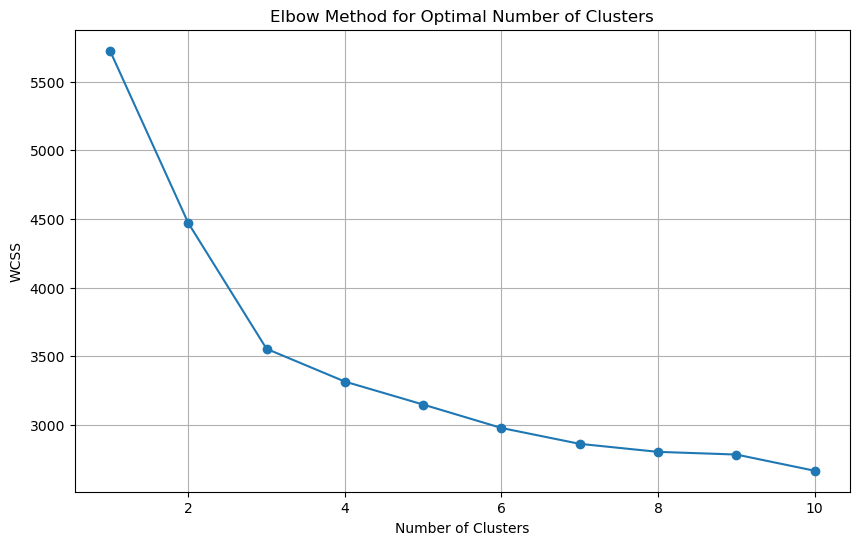

In [5]:
wcss = []
for n_clusters in range(1, 11):  
    kmeans = KMeans(n_clusters , random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure (figsize=(10, 6))
plt.plot   (range(1, 11), wcss, marker='o')
plt.title  ('Elbow Method for Optimal Number of Clusters')
plt.xlabel ('Number of Clusters')
plt.ylabel ('WCSS')
plt.grid   (True)
plt.show   ()

In [6]:
optimal_clusters = 3

kmeans   = KMeans(n_clusters = optimal_clusters , random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_cleaned['Cluster'] = clusters

In [7]:
print(df_cleaned['Cluster'].value_counts())

Cluster
1    260
0    202
2    174
Name: count, dtype: int64


In [8]:
print(f'Silhouette Score: {silhouette_score(X_scaled, clusters):.2f}')

Silhouette Score: 0.23
